In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Détection des valeurs aberrantes avec la méthode de l'Intervalle inter quartiles

In [33]:
# 1. Chargement du fichier
df = pd.read_csv('../RAW_data/produits.csv')

# 2. Aperçu des premières lignes
print("Aperçu du fichier :")
display(df.head())

# 3. Infos générales (types, NaNs...)
print("\nInfos sur les colonnes :")
display(df.info())

# 4. Suppression des doublons
df = df.drop_duplicates()

# 5. Affichage des valeurs manquantes par colonne
print("\nValeurs manquantes par colonne :")
display(df.isnull().sum())

# 6. Suppression ou remplissage des valeurs manquantes
# Exemple : on remplit les colonnes numériques avec la moyenne
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Exemple : on remplit les colonnes catégorielles avec la valeur la plus fréquente
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 7. Vérification du nettoyage
print("\nAperçu après nettoyage :")
display(df.head())



Aperçu du fichier :


,id_produit;catégorie;marque;prix;stock_minimum
0,P00001;Soins capillaires;Luxe Éclat;467.42;52
1,P00002;Accessoires;Maison Pure;291.26;10
2,P00003;Maquillage;Essentielle Paris;354.39;60
3,P00004;Accessoires;Reflet d’Or;462.8;33
4,P00005;Accessoires;Élixir Haute Beauté;359.47;33



Infos sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   id_produit;catégorie;marque;prix;stock_minimum  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


None


Valeurs manquantes par colonne :


id_produit;catégorie;marque;prix;stock_minimum    0
dtype: int64


Aperçu après nettoyage :


C:\Users\Jules\AppData\Local\Temp\ipykernel_14052\141607680.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,id_produit;catégorie;marque;prix;stock_minimum
0,P00001;Soins capillaires;Luxe Éclat;467.42;52
1,P00002;Accessoires;Maison Pure;291.26;10
2,P00003;Maquillage;Essentielle Paris;354.39;60
3,P00004;Accessoires;Reflet d’Or;462.8;33
4,P00005;Accessoires;Élixir Haute Beauté;359.47;33


In [34]:

outliers = {}

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # On garde les lignes considérées comme aberrantes
    mask_outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers_count = mask_outliers.sum()
    
    if outliers_count > 0:
        outliers[col] = df[mask_outliers]

# Affichage des résultats
if outliers:
    for col, data in outliers.items():
        print(f"\nValeurs aberrantes détectées dans la colonne '{col}' ({len(data)} valeurs) :")
        display(data[[col]])
else:
    print("✅ Aucune valeur aberrante détectée dans les colonnes numériques.")


✅ Aucune valeur aberrante détectée dans les colonnes numériques.


In [35]:
# Vérifie s'il y a des doublons (lignes identiques)
duplicated_rows = df[df.duplicated()]

# Affiche le nombre de doublons
print(f"Nombre de lignes dupliquées : {duplicated_rows.shape[0]}")

# Affiche les lignes dupliquées si elles existent
if not duplicated_rows.empty:
    print("Voici les doublons :")
    display(duplicated_rows)
else:
    print("✅ Aucun doublon détecté.")

Nombre de lignes dupliquées : 0
✅ Aucun doublon détecté.


In [36]:
# 1. Affiche les colonnes catégorielles (object ou category)
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("Colonnes catégorielles :")
print(list(cat_cols))

# 2. Affiche les valeurs uniques pour chaque colonne catégorielle
print("\nValeurs uniques par colonne catégorielle :")
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())
    print("-" * 30)

Colonnes catégorielles :
['id_produit;catégorie;marque;prix;stock_minimum']

Valeurs uniques par colonne catégorielle :

--- id_produit;catégorie;marque;prix;stock_minimum ---
id_produit;catégorie;marque;prix;stock_minimum
P01000;Maquillage;Héritage Sensuel;60.7;31          1
P00001;Soins capillaires;Luxe Éclat;467.42;52       1
P00002;Accessoires;Maison Pure;291.26;10            1
P00003;Maquillage;Essentielle Paris;354.39;60       1
P00004;Accessoires;Reflet d’Or;462.8;33             1
                                                   ..
P00013;Accessoires;Essentielle Paris;236.4;61       1
P00012;Maquillage;Maison Pure;464.27;20             1
P00011;Soins capillaires;Luxe Éclat;468.5;40        1
P00010;Accessoires;Élixir Haute Beauté;373.49;67    1
P00009;Maquillage;Reflet d’Or;223.58;30             1
Name: count, Length: 1000, dtype: int64
------------------------------


In [37]:
# Pour une belle mise en forme des graphiques
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# 1. Colonnes catégorielles
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("🎯 Colonnes catégorielles :", list(cat_cols))

# 2. Affichage des valeurs uniques et graphiques barres
for col in cat_cols:
    print(f"\n🔸 {col} - Top catégories")
    print(df[col].value_counts().head(10))
    

🎯 Colonnes catégorielles : ['id_produit;catégorie;marque;prix;stock_minimum']

🔸 id_produit;catégorie;marque;prix;stock_minimum - Top catégories
id_produit;catégorie;marque;prix;stock_minimum
P01000;Maquillage;Héritage Sensuel;60.7;31          1
P00001;Soins capillaires;Luxe Éclat;467.42;52       1
P00002;Accessoires;Maison Pure;291.26;10            1
P00003;Maquillage;Essentielle Paris;354.39;60       1
P00004;Accessoires;Reflet d’Or;462.8;33             1
P00005;Accessoires;Élixir Haute Beauté;359.47;33    1
P00006;Parfums;Luxe Éclat;93.22;26                  1
P00007;Maquillage;Maison Pure;296.62;14             1
P00984;Parfums;Ligne Lumière;423.62;81              1
P00983;Soins capillaires;Épure d'Azur;142.24;82     1
Name: count, dtype: int64


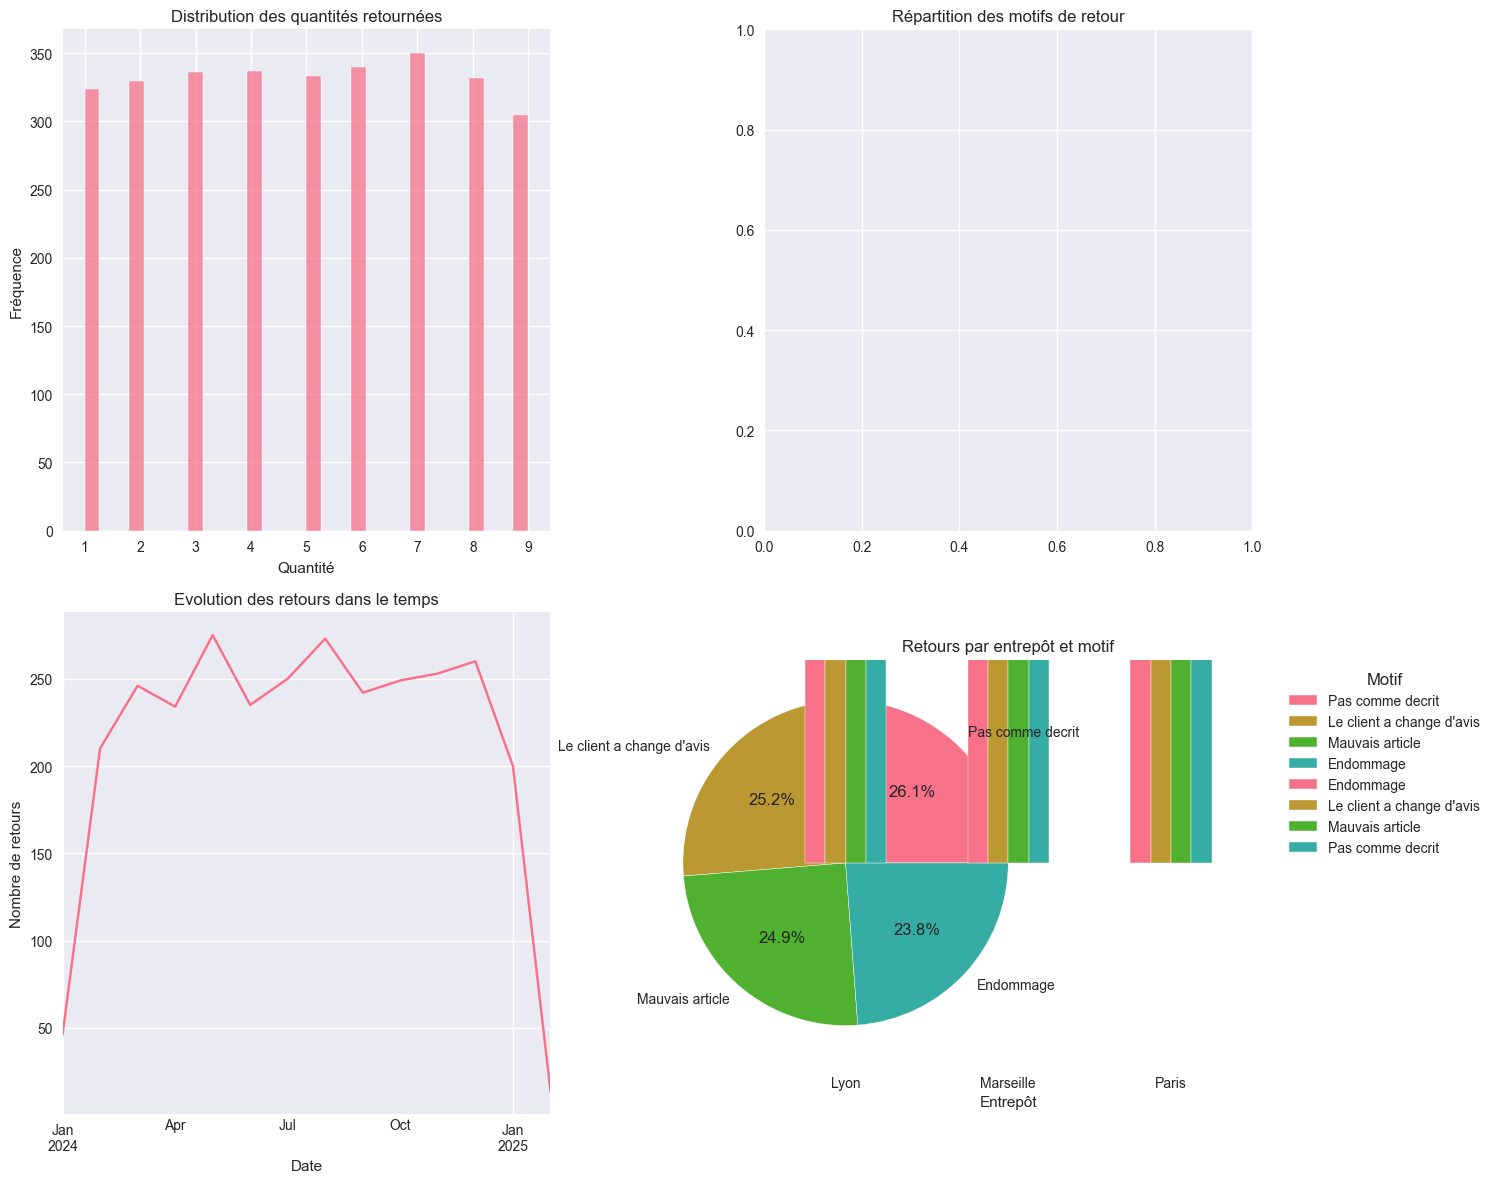

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture du fichier des retours
df_retours = pd.read_csv('../RAW_data/retours.csv', sep=';')

# Configuration du style des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Création d'une figure avec 2x2 sous-graphiques
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution des quantités retournées
sns.histplot(data=df_retours, x='quantite', bins=30, ax=ax1)
ax1.set_title('Distribution des quantités retournées')
ax1.set_xlabel('Quantité')
ax1.set_ylabel('Fréquence')

# 2. Répartition des motifs de retour
motifs_count = df_retours['motif'].value_counts()
plt.pie(motifs_count, labels=motifs_count.index, autopct='%1.1f%%')
ax2.set_title('Répartition des motifs de retour')

# 3. Evolution temporelle des retours
df_retours['date_retour'] = pd.to_datetime(df_retours['date_retour'], format='%d/%m/%Y')
retours_mensuel = df_retours.groupby(df_retours['date_retour'].dt.to_period('M')).size()
retours_mensuel.plot(kind='line', ax=ax3)
ax3.set_title('Evolution des retours dans le temps')
ax3.set_xlabel('Date')
ax3.set_ylabel('Nombre de retours')

# 4. Nombre de retours par entrepôt et motif
retours_entrepot = df_retours.groupby(['entrepot', 'motif']).size().unstack()
retours_entrepot.plot(kind='bar', ax=ax4)
ax4.set_title('Retours par entrepôt et motif')
ax4.set_xlabel('Entrepôt')
ax4.set_ylabel('Nombre de retours')
ax4.legend(title='Motif', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
